# **Study Case 1.B: Evaluating Learning Personalization from Projects of MIT App Inventor: Introduction To Programming (Agglomerative)**

In [ ]:
import pandas as pd
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.vq import vq
from sklearn.neighbors import NearestCentroid

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
file = "dataset.csv"

In [ ]:
df = pd.read_csv(file, sep=';')

In [ ]:
df.describe()

,AppVersionCode,NumberOfScreens,NumberOfTotalBlocks,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,NumberOfConditionalBlocks,NumberOfLoopsBlocks,NumberOfGlobalVariables,NumberOfLocalVariables,...,NumberOfWhileLoopsWithoutCondition,NumberOfVariablesInConditionNotUpdated,NumberOfCamelCaseVariables,NumberOfCamelCaseDefinedFunctionalBlocks,NumberOfPascalCaseVariables,NumberOfPascalCaseDefinedFunctionalBlocks,NumberOfSnakeCaseVariables,NumberOfSnakeCaseDefinedFunctionalBlocks,NumberOfNoneCaseVariables,NumberOfNoneCaseDefinedFunctionalBlocks
count,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.00000,...,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000
mean,1.284844,1.153300,128.620649,1.447999,9.941778,8.266837,3.946633,0.266990,3.463316,0.30812,...,0.000929,0.731421,0.522932,0.384020,0.315869,0.288812,0.586818,0.208373,2.345817,0.566794
std,8.437006,0.756459,138.737149,2.617231,13.532433,10.069302,5.811005,0.980861,4.889437,1.11695,...,0.056611,1.338948,1.540991,1.187401,1.223953,1.184697,2.231482,0.929029,3.649413,1.550008
min,0.000000,1.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,85.000000,0.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,106.000000,0.000000,7.000000,6.000000,3.000000,0.000000,2.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,1.000000,140.000000,2.000000,13.000000,10.000000,5.000000,0.000000,5.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,999.000000,30.000000,19000.000000,241.000000,915.000000,1235.000000,755.000000,74.000000,298.000000,82.00000,...,20.000000,163.000000,118.000000,140.000000,86.000000,94.000000,139.000000,72.000000,298.000000,241.000000


In [ ]:
print(df.shape)

(215244, 58)


**1) Seletecting columns to create the model from dataset:**

In [ ]:
X = np.array(df[['NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables']])

**3) Clustering using scikit-learn:**

**A) Test K=4**


---



In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.5143156158270548


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

1.0014901326212065


In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,ProjectID,ProjectName,AppName,AppVersionCode,AppVersionName,NumberOfScreens,NumberOfTotalBlocks,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,...,NumberOfVariablesInConditionNotUpdated,NumberOfCamelCaseVariables,NumberOfCamelCaseDefinedFunctionalBlocks,NumberOfPascalCaseVariables,NumberOfPascalCaseDefinedFunctionalBlocks,NumberOfSnakeCaseVariables,NumberOfSnakeCaseDefinedFunctionalBlocks,NumberOfNoneCaseVariables,NumberOfNoneCaseDefinedFunctionalBlocks,cluster_
0,Project6219723469619200,WoodMole,WoodMole,1,1_0,1,77,1,2,6,...,0,0,0,0,1,1,0,3,0,0
1,Project5212695245619200,BOLETIMDOTECNICO_copy,TER_-_ANUAIS,1,1_0,1,108,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Project5769878221619200,BASEDATOS,BASEDATOS,1,1_0,1,143,0,11,6,...,0,1,0,0,0,0,0,1,0,0
3,Project4712690381619200,A20180627,A20180627,1,1_0,1,144,1,14,17,...,1,0,0,0,0,0,0,2,1,0
4,Project4936161997619200,Localizacion,Localizacion,1,1_0,1,170,0,0,7,...,0,0,0,0,0,1,0,6,0,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

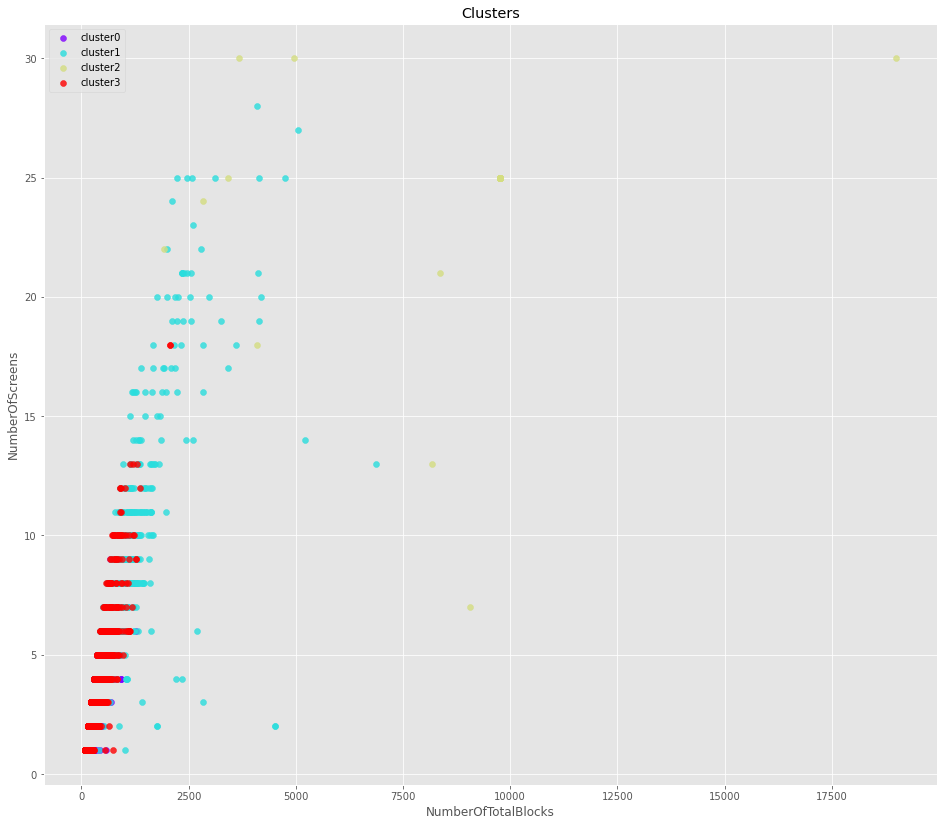

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df.groupby(['cluster_'])['cluster_'].count()

cluster_
0    191668
1      3457
2        27
3     20092
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()
agg_clusters

/tmp/ipykernel_349805/3234018314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()


,NumberOfTotalBlocks,NumberOfScreens,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,NumberOfConditionalBlocks,NumberOfLoopsBlocks,NumberOfGlobalVariables,NumberOfLocalVariables
cluster_,,,,,,,,,
0,112.700075,1.044123,1.250522,7.276149,6.785687,3.367662,0.240426,3.136105,0.276363
1,526.971073,4.265837,5.222447,64.311253,39.357535,16.820364,0.816315,12.054382,1.561759
2,8570.074074,23.888889,55.925926,594.962963,426.407407,245.148148,3.222222,182.222222,9.333333
3,200.611885,1.628708,2.609198,25.229693,16.484969,6.930569,0.421909,4.866365,0.383237


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

1.2505217355009703 7.2761493833086375 6.785686708266377 3.367661790178851 0.24042615355719266 3.1361051401381554 0.2763632948640357
5.222447208562337 64.31125253109633 39.35753543534857 16.820364477870985 0.8163147237489152 12.054382412496384 1.5617587503615853
55.925925925925924 594.9629629629629 426.4074074074074 245.14814814814815 3.2222222222222223 182.22222222222223 9.333333333333334
2.609197690623134 25.229693410312564 16.484969141947044 6.930569380848099 0.4219092175990444 4.866364722277523 0.3832371092972327


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

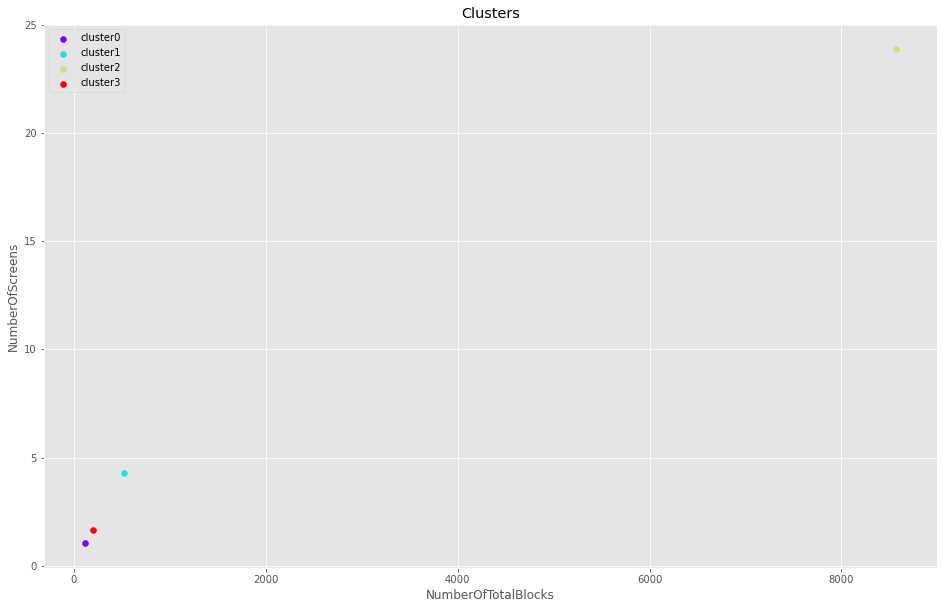

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

**B) Test K=5**


---



In [ ]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.22343012039056806


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

1.1549381116107813


In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,ProjectID,ProjectName,AppName,AppVersionCode,AppVersionName,NumberOfScreens,NumberOfTotalBlocks,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,...,NumberOfVariablesInConditionNotUpdated,NumberOfCamelCaseVariables,NumberOfCamelCaseDefinedFunctionalBlocks,NumberOfPascalCaseVariables,NumberOfPascalCaseDefinedFunctionalBlocks,NumberOfSnakeCaseVariables,NumberOfSnakeCaseDefinedFunctionalBlocks,NumberOfNoneCaseVariables,NumberOfNoneCaseDefinedFunctionalBlocks,cluster_
0,Project6219723469619200,WoodMole,WoodMole,1,1_0,1,77,1,2,6,...,0,0,0,0,1,1,0,3,0,4
1,Project5212695245619200,BOLETIMDOTECNICO_copy,TER_-_ANUAIS,1,1_0,1,108,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,Project5769878221619200,BASEDATOS,BASEDATOS,1,1_0,1,143,0,11,6,...,0,1,0,0,0,0,0,1,0,1
3,Project4712690381619200,A20180627,A20180627,1,1_0,1,144,1,14,17,...,1,0,0,0,0,0,0,2,1,1
4,Project4936161997619200,Localizacion,Localizacion,1,1_0,1,170,0,0,7,...,0,0,0,0,0,1,0,6,0,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

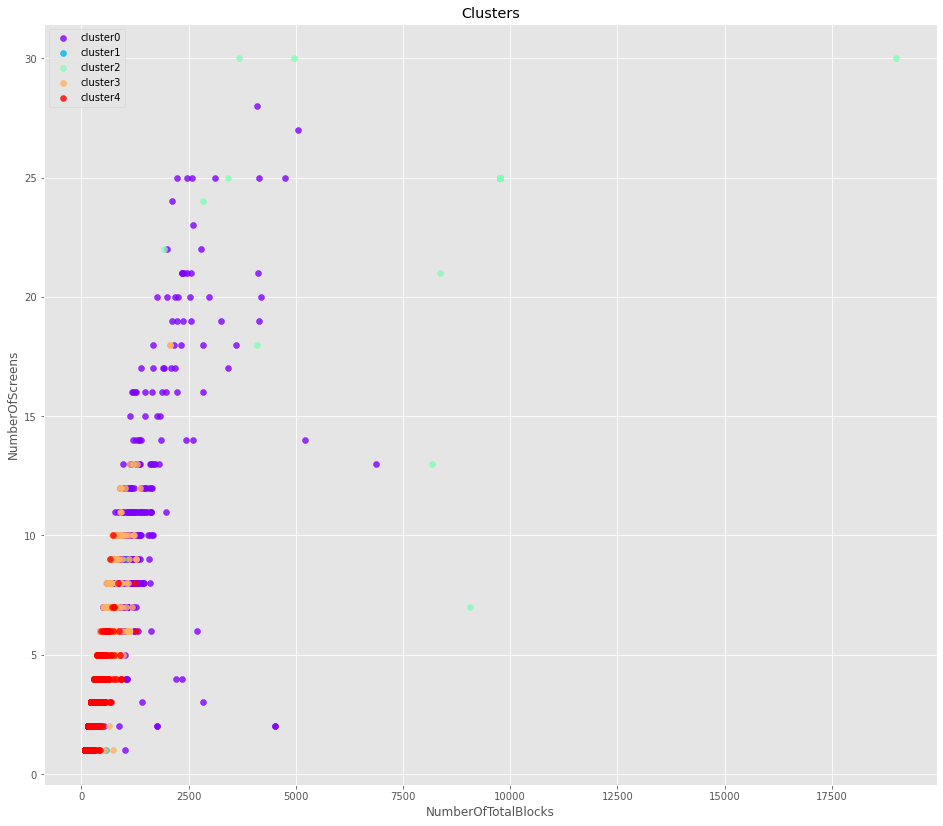

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df.groupby(['cluster_'])['cluster_'].count()

cluster_
0      3457
1    109615
2        27
3     20092
4     82053
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()
agg_clusters

/tmp/ipykernel_349805/3234018314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()


,NumberOfTotalBlocks,NumberOfScreens,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,NumberOfConditionalBlocks,NumberOfLoopsBlocks,NumberOfGlobalVariables,NumberOfLocalVariables
cluster_,,,,,,,,,
0,526.971073,4.265837,5.222447,64.311253,39.357535,16.820364,0.816315,12.054382,1.561759
1,116.015062,1.048999,1.640168,10.766337,8.311536,3.397272,0.130739,2.327683,0.164658
2,8570.074074,23.888889,55.925926,594.962963,426.407407,245.148148,3.222222,182.222222,9.333333
3,200.611885,1.628708,2.609198,25.229693,16.484969,6.930569,0.421909,4.866365,0.383237
4,108.271568,1.037610,0.729992,2.613591,4.747297,3.328105,0.386957,4.216080,0.425591


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

5.222447208562337 64.31125253109633 39.35753543534857 16.820364477870985 0.8163147237489152 12.054382412496384 1.5617587503615853
1.640167860238106 10.766336723988505 8.31153582995028 3.3972722711307757 0.1307394061031793 2.327683255028965 0.16465812160744422
55.925925925925924 594.9629629629629 426.4074074074074 245.14814814814815 3.2222222222222223 182.22222222222223 9.333333333333334
2.609197690623134 25.229693410312564 16.484969141947044 6.930569380848099 0.4219092175990444 4.866364722277523 0.3832371092972327
0.7299915908010676 2.6135912154339267 4.7472974784590445 3.3281050053014516 0.38695721058340343 4.216079850828123 0.425590776693113


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

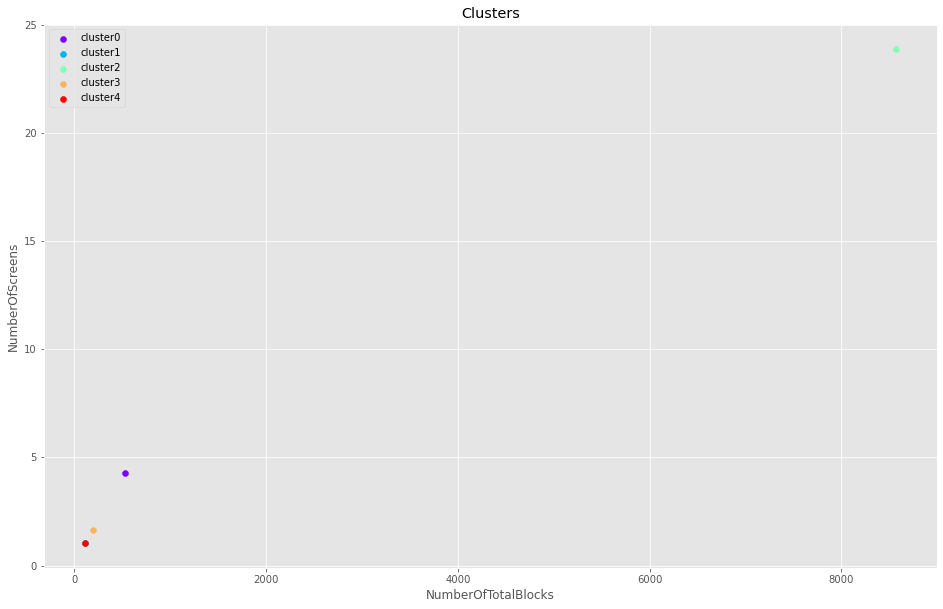

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

**C) Test K=6**

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.22472981142638948


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

1.1626208662629078


In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,ProjectID,ProjectName,AppName,AppVersionCode,AppVersionName,NumberOfScreens,NumberOfTotalBlocks,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,...,NumberOfVariablesInConditionNotUpdated,NumberOfCamelCaseVariables,NumberOfCamelCaseDefinedFunctionalBlocks,NumberOfPascalCaseVariables,NumberOfPascalCaseDefinedFunctionalBlocks,NumberOfSnakeCaseVariables,NumberOfSnakeCaseDefinedFunctionalBlocks,NumberOfNoneCaseVariables,NumberOfNoneCaseDefinedFunctionalBlocks,cluster_
0,Project6219723469619200,WoodMole,WoodMole,1,1_0,1,77,1,2,6,...,0,0,0,0,1,1,0,3,0,4
1,Project5212695245619200,BOLETIMDOTECNICO_copy,TER_-_ANUAIS,1,1_0,1,108,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,Project5769878221619200,BASEDATOS,BASEDATOS,1,1_0,1,143,0,11,6,...,0,1,0,0,0,0,0,1,0,1
3,Project4712690381619200,A20180627,A20180627,1,1_0,1,144,1,14,17,...,1,0,0,0,0,0,0,2,1,1
4,Project4936161997619200,Localizacion,Localizacion,1,1_0,1,170,0,0,7,...,0,0,0,0,0,1,0,6,0,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

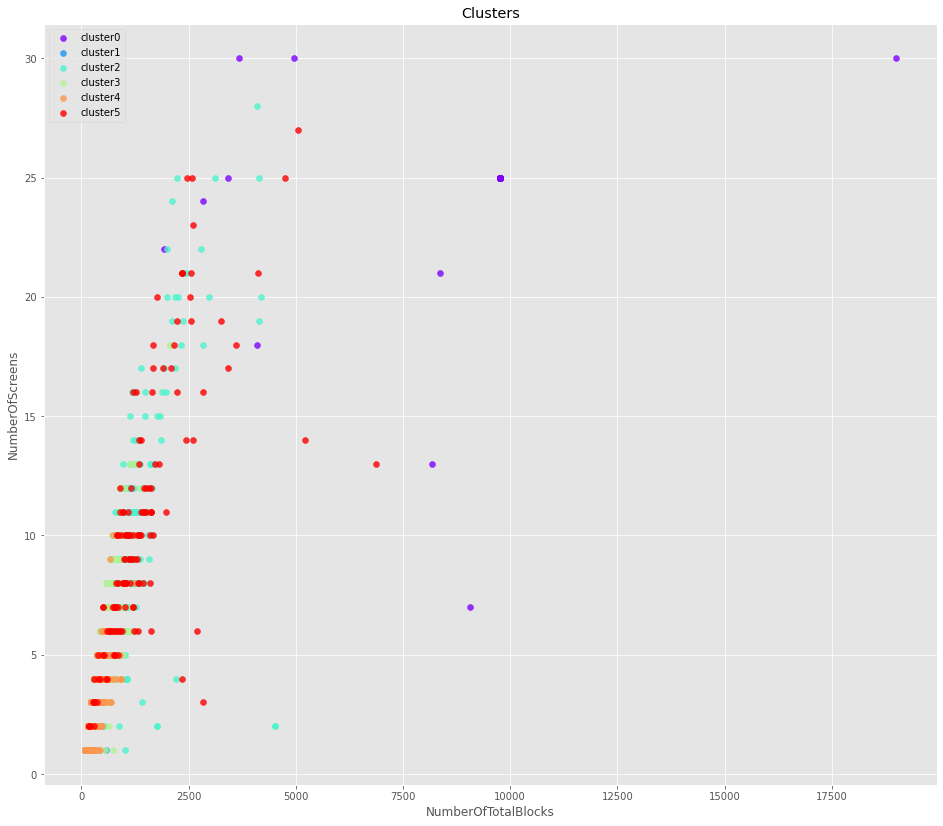

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df.groupby(['cluster_'])['cluster_'].count()

cluster_
0        27
1    109615
2      3314
3     20092
4     82053
5       143
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()
agg_clusters

/tmp/ipykernel_349805/3234018314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()


,NumberOfTotalBlocks,NumberOfScreens,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,NumberOfConditionalBlocks,NumberOfLoopsBlocks,NumberOfGlobalVariables,NumberOfLocalVariables
cluster_,,,,,,,,,
0,8570.074074,23.888889,55.925926,594.962963,426.407407,245.148148,3.222222,182.222222,9.333333
1,116.015062,1.048999,1.640168,10.766337,8.311536,3.397272,0.130739,2.327683,0.164658
2,488.498491,4.006337,4.737477,58.993060,35.267351,15.846107,0.772782,11.653893,1.557634
3,200.611885,1.628708,2.609198,25.229693,16.484969,6.930569,0.421909,4.866365,0.383237
4,108.271568,1.037610,0.729992,2.613591,4.747297,3.328105,0.386957,4.216080,0.425591
5,1418.566434,10.279720,16.461538,187.559441,134.146853,39.398601,1.825175,21.335664,1.657343


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

55.925925925925924 594.9629629629629 426.4074074074074 245.14814814814815 3.2222222222222223 182.22222222222223 9.333333333333334
1.640167860238106 10.766336723988505 8.31153582995028 3.3972722711307757 0.1307394061031793 2.327683255028965 0.16465812160744422
4.737477368738684 58.99305974652987 35.26735063367531 15.846107423053711 0.7727821363910682 11.653892576946289 1.5576342788171393
2.609197690623134 25.229693410312564 16.484969141947044 6.930569380848099 0.4219092175990444 4.866364722277523 0.3832371092972327
0.7299915908010676 2.6135912154339267 4.7472974784590445 3.3281050053014516 0.38695721058340343 4.216079850828123 0.425590776693113
16.46153846153846 187.55944055944056 134.14685314685315 39.3986013986014 1.8251748251748252 21.335664335664337 1.6573426573426573


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

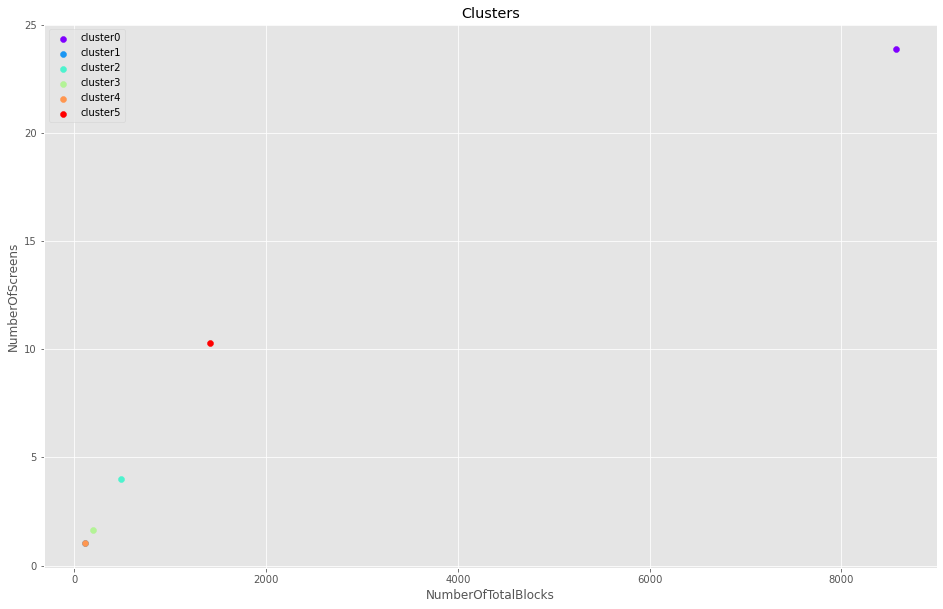

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

**D) Test K=3**

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.5885034538737697


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

0.850967222552368


In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,ProjectID,ProjectName,AppName,AppVersionCode,AppVersionName,NumberOfScreens,NumberOfTotalBlocks,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,...,NumberOfVariablesInConditionNotUpdated,NumberOfCamelCaseVariables,NumberOfCamelCaseDefinedFunctionalBlocks,NumberOfPascalCaseVariables,NumberOfPascalCaseDefinedFunctionalBlocks,NumberOfSnakeCaseVariables,NumberOfSnakeCaseDefinedFunctionalBlocks,NumberOfNoneCaseVariables,NumberOfNoneCaseDefinedFunctionalBlocks,cluster_
0,Project6219723469619200,WoodMole,WoodMole,1,1_0,1,77,1,2,6,...,0,0,0,0,1,1,0,3,0,1
1,Project5212695245619200,BOLETIMDOTECNICO_copy,TER_-_ANUAIS,1,1_0,1,108,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Project5769878221619200,BASEDATOS,BASEDATOS,1,1_0,1,143,0,11,6,...,0,1,0,0,0,0,0,1,0,1
3,Project4712690381619200,A20180627,A20180627,1,1_0,1,144,1,14,17,...,1,0,0,0,0,0,0,2,1,1
4,Project4936161997619200,Localizacion,Localizacion,1,1_0,1,170,0,0,7,...,0,0,0,0,0,1,0,6,0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'NumberOfScreens')

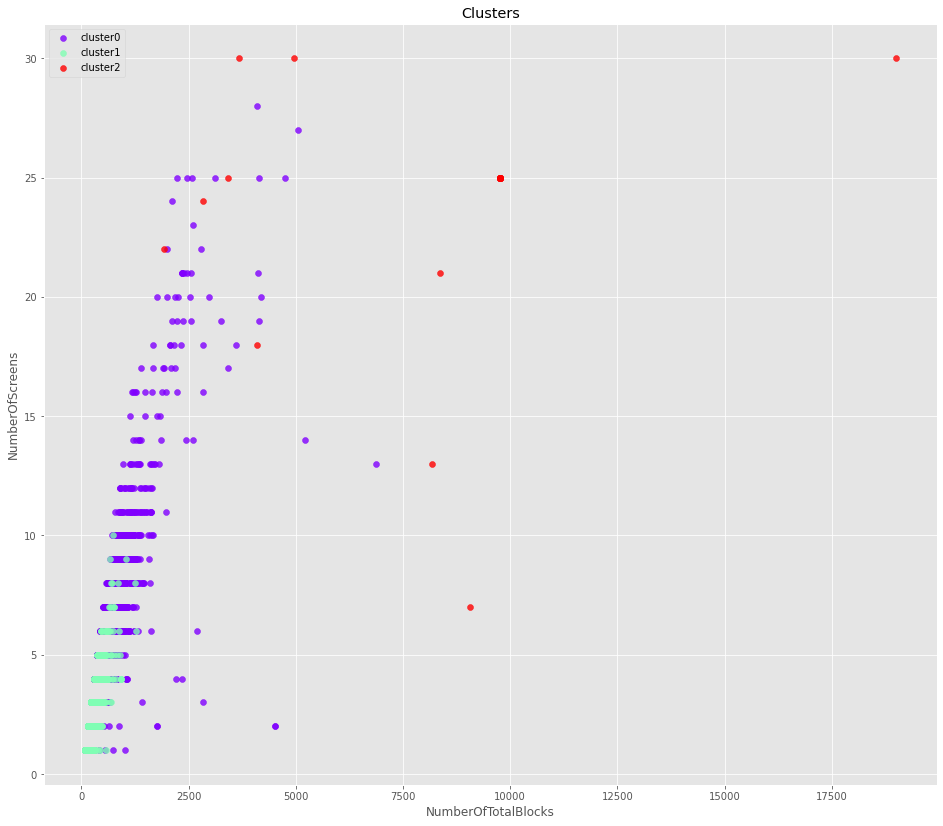

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df.groupby(['cluster_'])['cluster_'].count()

cluster_
0     23549
1    191668
2        27
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()
agg_clusters

/tmp/ipykernel_349805/3234018314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_clusters = df.groupby(['cluster_'])['NumberOfTotalBlocks', 'NumberOfScreens','NumberOfDefinedFunctionalBlocks','NumberOfUsedFunctionalBlocks','NumberOfEventsBlocks','NumberOfConditionalBlocks','NumberOfLoopsBlocks','NumberOfGlobalVariables','NumberOfLocalVariables'].mean()


,NumberOfTotalBlocks,NumberOfScreens,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,NumberOfConditionalBlocks,NumberOfLoopsBlocks,NumberOfGlobalVariables,NumberOfLocalVariables
cluster_,,,,,,,,,
0,248.521508,2.015839,2.992823,30.966878,19.842668,8.382394,0.479808,5.921568,0.556244
1,112.700075,1.044123,1.250522,7.276149,6.785687,3.367662,0.240426,3.136105,0.276363
2,8570.074074,23.888889,55.925926,594.962963,426.407407,245.148148,3.222222,182.222222,9.333333


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

2.992823474457514 30.966877574419296 19.842668478491657 8.382394156864411 0.4798080597902246 5.92156779481082 0.5562444265149263
1.2505217355009703 7.2761493833086375 6.785686708266377 3.367661790178851 0.24042615355719266 3.1361051401381554 0.2763632948640357
55.925925925925924 594.9629629629629 426.4074074074074 245.14814814814815 3.2222222222222223 182.22222222222223 9.333333333333334


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'NumberOfScreens')

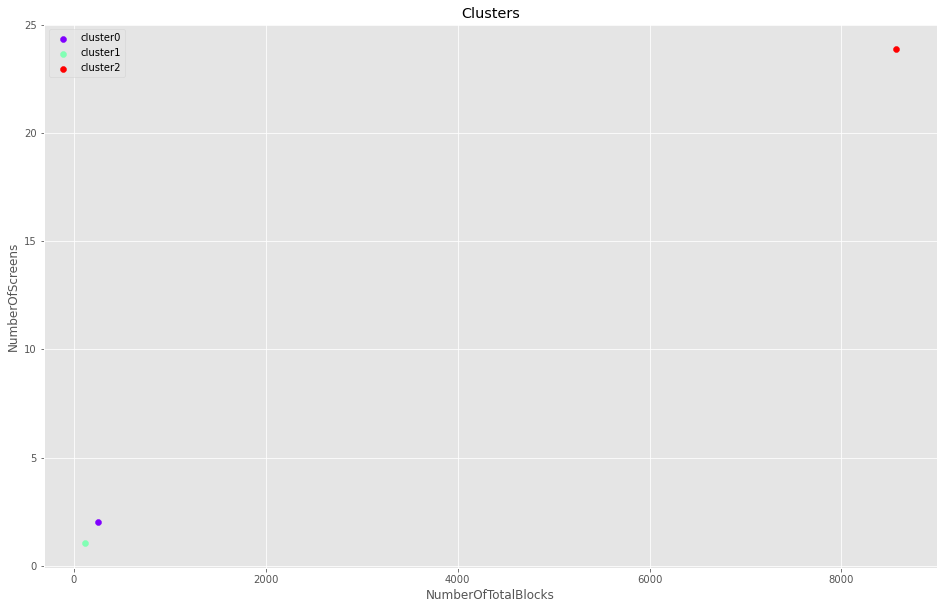

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')